In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [36]:
cmnt = data['comment_text'][105]
cmnt
#data.iloc[105,2:7]

'a pair of jew hating weiner nazi schmucks'

In [5]:
#Pearsons Co relation Coefficient 
from scipy.stats import pearsonr
p1 = pearsonr(data['toxic'], data['severe_toxic'])
p2 = pearsonr(data['insult'], data['identity_hate'])
p3 = pearsonr(data['obscene'], data['insult'])
print("Toxic and Severe Toxic   : ",p1)
print("Insult and identity hate : ",p2)
print("Obscene and threat       : ",p3)

Toxic and Severe Toxic   :  (0.30861909674069965, 0.0)
Insult and identity hate :  (0.337736253931426, 0.0)
Obscene and threat       :  (0.7412724362039557, 0.0)


In [8]:
#comment_text1 = pd.DataFrame(data.comment_text)
#comment_text1 = data.iloc[:2,1]
#comment_text1 = data.comment_text.str.cat(sep=' ')
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('@', ' ', text)
    text = re.sub('[0-9]','',text)
    text = text.strip(' ')
    return text
    

In [9]:
cleaned_comment = []
for i in range(0,len(data)):
    comment = clean_text(data['comment_text'][i])
    cleaned_comment.append(comment)
data['comment_text'] = pd.Series(cleaned_comment).astype(str)

In [6]:
cleaned_test_comment = []
for i in range(0,len(test_data)):
    comment = clean_text(test_data['comment_text'][i])
    cleaned_test_comment.append(comment)
test_data['comment_text'] = pd.Series(cleaned_test_comment).astype(str)

In [14]:
data.head()
#test_data.head()
#tokens = word_tokenize(comment_text1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [15]:
print(data['comment_text'][100])


however the moonlite edit noted by golden daph was me on optus wake up wikkis so funny


In [32]:
freq_distribution

FreqDist({'the': 495406, '.': 488875, ',': 471812, 'to': 296826, "''": 240687, 'i': 236737, 'of': 224002, 'and': 222708, 'you': 216272, 'a': 214245, ...})

(array([158166.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   1405.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

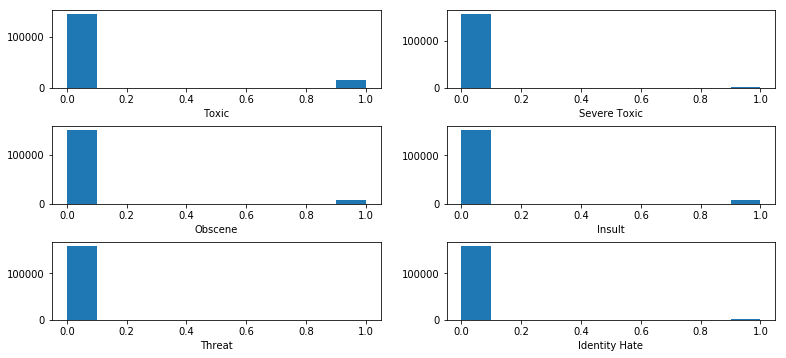

In [8]:
plt.subplot(3,2,1)
plt.xlabel('Toxic')
plt.hist(data.iloc[:,2])
plt.subplot(3,2,2)
plt.xlabel('Severe Toxic')
plt.subplots_adjust(right=1.8,hspace=0.5,top=1.2)
plt.hist(data.iloc[:,3])

plt.subplot(3,2,3)
plt.xlabel('Obscene')
plt.hist(data.iloc[:,4])

plt.subplot(3,2,4)
plt.xlabel('Insult')
plt.hist(data.iloc[:,6])

plt.subplot(3,2,5)
plt.xlabel('Threat')
plt.hist(data.iloc[:,5])

plt.subplot(3,2,6)
plt.xlabel('Identity Hate')
plt.hist(data.iloc[:,7])

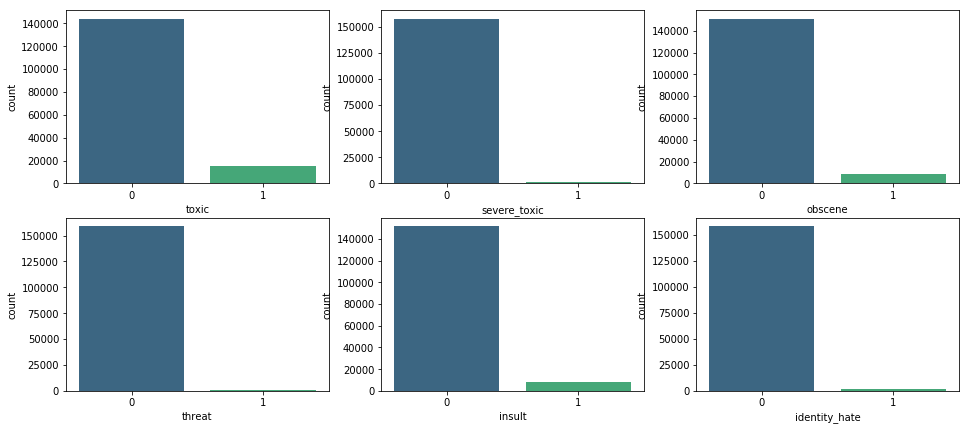

In [11]:
fig,ax = plt.subplots(2,3,figsize=(16,7))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(data['toxic'],palette= 'viridis',ax=ax1)
sns.countplot(data['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(data['obscene'], palette= 'viridis',ax=ax3)
sns.countplot(data['threat'], palette= 'viridis',ax = ax4)
sns.countplot(data['insult'], palette = 'viridis',ax=ax5)
sns.countplot(data['identity_hate'], palette = 'viridis', ax = ax6)
fig.savefig('graph')

In [17]:
target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [18]:
X = data.comment_text
test_X = test_data.comment_text

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=40000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=40000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [20]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_trans = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_trans

<159571x40000 sparse matrix of type '<class 'numpy.float64'>'
	with 3700235 stored elements in Compressed Sparse Row format>

In [21]:
y_trans = data.iloc[:,2:8]

In [12]:
test_X_trans = vect.transform(test_X)
test_X_trans

<153164x40000 sparse matrix of type '<class 'numpy.float64'>'
	with 3143536 stored elements in Compressed Sparse Row format>

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_trans,y_trans,test_size=0.3)

# Decesion Tree

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
lr = LogisticRegression(C=12.0)

# create submission file
submission_binary = pd.read_csv('prediction.csv')

change_acc_bin = []
for i,label in enumerate(target):
    print('... Processing {}'.format(label))
    y = y_train[label]
    dtc.fit(X_train,y)
    #lr.fit(X_train,y)
    #y_pred_X = lr.predict(X_train)
    y_pred_X = dtc.predict(X_train)
    print('Training accuracy is     {}'.format(accuracy_score(y, y_pred_X)*100))
    # compute the predicted probabilities for X_test_dtm
    #test_y_prob = lr.predict_proba(test_X_trans)[:,1]
    #prediction = lr.predict(X_test)
    prediction = dtc.predict(X_test)
    test_y_prob = accuracy_score(y_test[label],prediction)
    print('Testing accuracy is      {}'.format(test_y_prob*100))
    print(confusion_matrix(y_test[label],prediction))
    #op = pd.DataFrame({'Actual':y_test[label],'Predicted':prediction})
    #print(op)
    print("\nClassification Report : \n")
    print(classification_report(y_test[label],prediction))
    print("")
    print(50*'_')
   # submission_binary[label] = test_y_prob

... Processing toxic
Training accuracy is     99.945388947081
Testing accuracy is      93.98395721925134
[[41857  1409]
 [ 1471  3135]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43266
           1       0.69      0.68      0.69      4606

   micro avg       0.94      0.94      0.94     47872
   macro avg       0.83      0.82      0.83     47872
weighted avg       0.94      0.94      0.94     47872


__________________________________________________
... Processing severe_toxic
Training accuracy is     99.95165578921925
Testing accuracy is      98.71323529411765
[[47133   264]
 [  352   123]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     47397
           1       0.32      0.26      0.29       475

   micro avg       0.99      0.99      0.99     47872
   macro avg       0.66      0.63      0.64     47872
weighted avg  

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(C=12.0)

# create submission file
#submission_binary = pd.read_csv('prediction.csv')

change_acc_bin = []
for i,label in enumerate(target):
    print('... Processing {}'.format(label))
    y = y_train[label]
    lr.fit(X_train,y)
    y_pred_X = lr.predict(X_train)
    print('Training accuracy is     {}'.format(accuracy_score(y, y_pred_X)*100))
    # compute the predicted probabilities for X_test_dtm
    #test_y_prob = lr.predict_proba(test_X_trans)[:,1]
    prediction = lr.predict(X_test)
    test_y_prob = accuracy_score(y_test[label],prediction)
    change_acc_bin.append(test_y_prob)
    print('Testing accuracy is      {}'.format(test_y_prob*100))
    print(confusion_matrix(y_test[label],prediction))
    #op = pd.DataFrame({'Actual':y_test[label],'Predicted':prediction})
    #print(op)
    #print(lr.predict(cmnt))
    #print("")
    print(50*'_')
   # submission_binary[label] = test_y_prob

... Processing toxic


c:\users\shubham\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy is     98.13964314810339
Testing accuracy is      95.76161430481284
[[42757   541]
 [ 1488  3086]]
__________________________________________________
... Processing severe_toxic
Training accuracy is     99.4350889443952
Testing accuracy is      99.04745989304813
[[47279   133]
 [  323   137]]
__________________________________________________
... Processing obscene
Training accuracy is     99.10742262688117
Testing accuracy is      97.88602941176471
[[45098   265]
 [  747  1762]]
__________________________________________________
... Processing threat
Training accuracy is     99.88361578886114
Testing accuracy is      99.72008689839572
[[47702    21]
 [  113    36]]
__________________________________________________
... Processing insult
Training accuracy is     98.60249420317102
Testing accuracy is      97.08806818181817
[[45184   414]
 [  980  1294]]
__________________________________________________
... Processing identity_hate
Training accuracy is     99.624884734

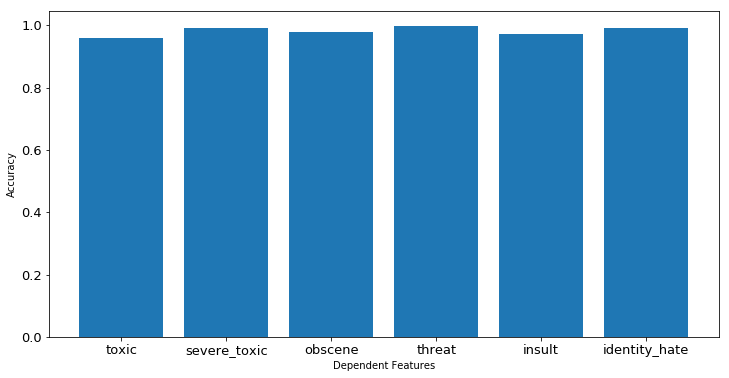

In [42]:
plt.bar(target,change_acc_bin)
plt.gcf().set_size_inches(12,6)
plt.tick_params(labelsize=13)
plt.xlabel('Dependent Features')
plt.ylabel('Accuracy')
plt.show()

# Binary Relevance Method

In [15]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

classifier = BinaryRelevance(
    classifier = SVC(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

c:\users\shubham\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
accuracy_score(y_test,predictions)

0.8977272727272727

In [73]:
cmnt = ['Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!']
cmnt = vect.transform(cmnt)

In [65]:
h = classifier.predict(cmnt)
h.toarray()

array([[0., 0., 0., 0., 0., 0.]])

# Saving Binary Relevance Built In Model

In [66]:
from sklearn.externals import joblib 
   
joblib.dump(classifier, 'br_builtin.pkl')  


['br_builtin.pkl']

In [67]:
br_from_joblib = joblib.load('br_builtin.pkl')
br_from_joblib.predict(cmnt)

<1x6 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

# Logistic Regression Classifier Chain

In [26]:
from skmultilearn.problem_transform import ClassifierChain

classifier = ClassifierChain(
    LogisticRegression(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

In [27]:
accuracy_score(y_test,predictions)

0.9197652072192514

In [30]:
from sklearn.externals import joblib 
load_model = joblib.dump(classifier,'lr.pkl')
#h = classifier.predict_proba(cmnt)
#h.toarray()

In [74]:
load_model1 = joblib.load('lr.pkl')
load_model1.predict_proba(cmnt).toarray()

array([[0.99998873, 0.34232343, 0.97835689, 0.11738408, 0.96085243,
        0.03861971]])

# KNN Binary Relevance

In [92]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.neighbors import KNeighborsClassifier

classifier = BinaryRelevance(
    KNeighborsClassifier(n_neighbors=10),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)
accuracy_score(y_test,predictions)

0.9016753008021391

In [93]:
joblib.dump(classifier,'knn.pkl')

['knn.pkl']

In [40]:
from sklearn.externals import joblib 

load_model = joblib.load('knn.pkl')

In [49]:
from itertools import chain 
p = load_model.predict_proba(cmnt).toarray()
p = p.tolist()
p = list(chain.from_iterable(p)) 
p

[0.045733151720667053,
 0.00017385441836222708,
 0.0045202883014617695,
 0.0003348449584345211,
 0.00391508037804954,
 0.0011640669859212826]

# Language Translation 

In [75]:
from textblob import TextBlob

from indic_transliteration import sanscript
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate

data = input("Enter text in hindi to classify : ")

or_word = transliterate(data, sanscript.ITRANS, sanscript.DEVANAGARI)
print("Hindi - ",or_word)
word = TextBlob(or_word)
translated = word.translate(from_lang='hi',to='en')
print("Translated - ",translated)

translated = str(translated)
translated = [translated]
translated
str1 = vect.transform(translated)

prediction = load_model.predict_proba(str1).toarray()
print("")
print("Predictions : ")
for index,i in enumerate(target) :
    print(i," : ",end='')
    print(prediction[0][index])

Enter text in hindi to classify : aap bure ho
Hindi -  आप् बुरे हो
Translated -  You are bad

Predictions : 
toxic  : 0.1904342779618528
severe_toxic  : 0.00017996390699984627
obscene  : 0.004181443128168837
threat  : 0.00027961521116992284
insult  : 0.005824443598115011
identity_hate  : 0.001007317011249877
